<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Scratch_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""Article https://github.com/MaviccPRP/svm/blob/master/svm-primal.ipynb""" 


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = np.array([-1,-1,1,1,1])


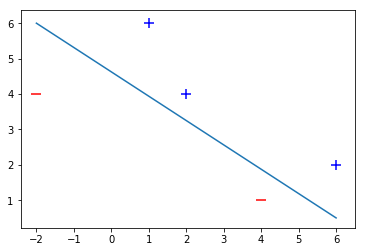

In [12]:
for i, sample in enumerate(X):
  plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2, c="r") if i < 2 else plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2, c="b")
plt.plot([-2,6],[6,0.5]) # Hyper Plane

In [0]:
"""
Using Hinge Loss

c(x, y, f(x)) = (1 - y *f(x))+ ( if y*f(x) > 0 then c(x, y, f(x)) = 0 )


Objective Function

 min w regularizer * || w || ** 2  + Sum i ( (1 - y_i<x_i,w>)+ )
 
 
 Derivative using w_k
 
            2 * regularizer * || w_k || +  0               ( In case of correct classification y_i<x_i,w> > 1 )
            
            2 * regularizer * || w_k || +  (-y_i * x_ik)   ( In case of miss classification    y_i<x_i,w> < 1 )
            
 Updates
 
      w  =  w - learning_rate * ( 2 * regularizer * || w_k ||                ), In case of correct classification
      w  =  w - learning_rate * ( 2 * regularizer * || w_k || - (y_i * x_ik) ), In case of miss classification
      
      
"""

In [0]:
def svm_algo(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    learning_rate = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        regularizer = 1.0/epoch
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w - learning_rate * ( (2 * regularizer * w)  -  X[i] * Y[i] )
                error = 1
            else:
                #correct classification, update our weights
                w = w - learning_rate * (2 * regularizer * w)
        errors.append(error)
        
    return w

In [43]:
w = svm_algo(X,y)
w

array([ 1.58876117,  3.17458055, 11.11863105])

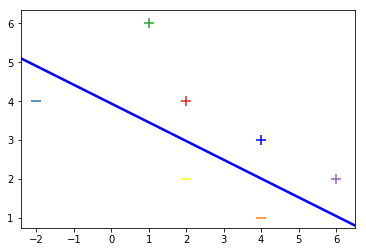

In [46]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')


# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

Classification once w is calculated

In [62]:
np.dot(X[0], w) < -1 # implies Negative

True

In [63]:
np.dot(X[4], w) < -1 # implies Positive

False